In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import calculate_eddy


In [8]:
U, V, sigma, T, S, P, x, y, z = calculate_eddy(taper_depth=400)


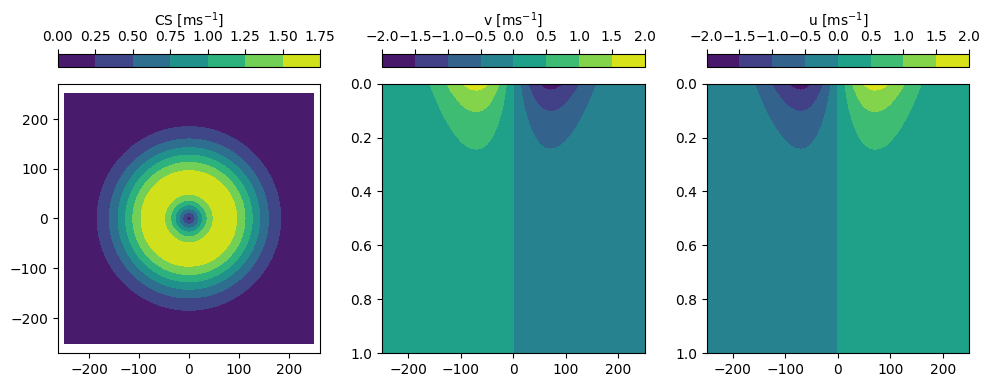

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

c0 = axs[0].contourf(x, y, np.hypot(U[:, :, 0], V[:, :, 0]))
fig.colorbar(c0, ax=axs[0], label=r'CS [ms$^{-1}$]', orientation='horizontal', location='top')
axs[0].axis('equal')

c1 = axs[1].contourf(x, -z, V[V.shape[0]//2, :, :].T)
fig.colorbar(c1, ax=axs[1], label=r'v [ms$^{-1}$]', orientation='horizontal', location='top')
axs[1].invert_yaxis()

c2 = axs[2].contourf(y, -z, U[:, U.shape[1]//2, :].T)
fig.colorbar(c2, ax=axs[2], label=r'u [ms$^{-1}$]', orientation='horizontal', location='top')
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()



In [40]:
alpha_1 = (x[1]-x[0])*1000/(z[1]-z[0]) # tilt in x direction
U, V, sigma, T, S, P, x, y, z = calculate_eddy(taper_depth=None, alpha_1=alpha_1)



In [42]:
alpha

np.float64(-200000.0)

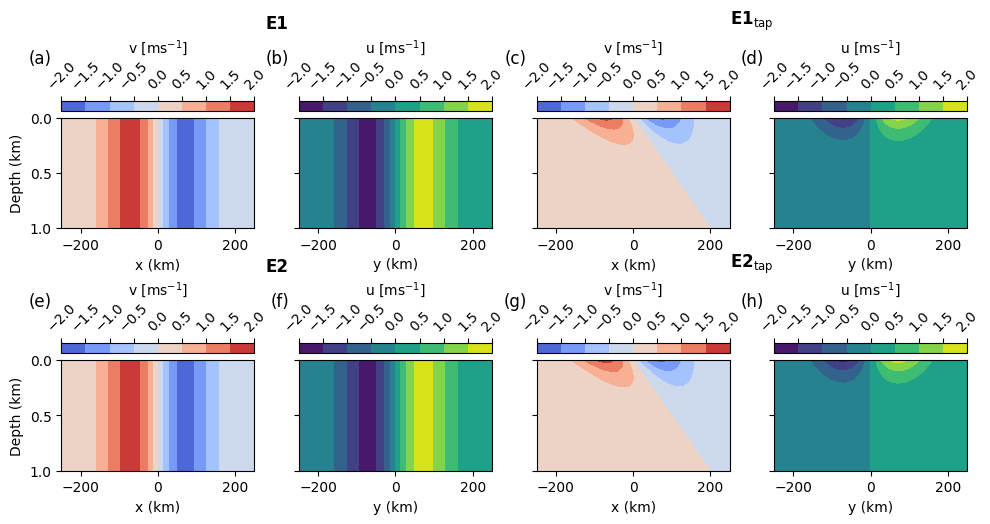

In [69]:
taper_depths = [None, 400, None, 400]
alpha = (x[1]-x[0])/(z[1]-z[0]) 
alpha_1s = [None, alpha, None, alpha]

fig, axs = plt.subplots(2, 4, figsize=(10, 5), sharey=True)
axs = axs.flatten()
for p, (taper_depth, alpha_1) in enumerate(zip(taper_depths, alpha_1s)):
    ax0, ax1 = axs[2*p], axs[2*p+1]
    if alpha_1 is None:
        U, V, sigma, T, S, P, *_ = calculate_eddy(taper_depth=taper_depth)
    else:
        U, V, sigma, T, S, P, *_ = calculate_eddy(taper_depth=taper_depth, alpha_1=alpha_1)        
    
    c0 = ax0.contourf(x, -z, V[V.shape[0]//2, :, :].T, cmap='coolwarm')
    cbar0 = fig.colorbar(c0, ax=ax0, label=r'v [ms$^{-1}$]', orientation='horizontal', location='top')
    for t in cbar0.ax.get_xticklabels():
        t.set_rotation(45)
    ax0.set_xlabel('x (km)')

    c1 = ax1.contourf(y, -z, U[:, U.shape[1]//2, :].T)
    cbar1 = fig.colorbar(c1, ax=ax1, label=r'u [ms$^{-1}$]', orientation='horizontal', location='top')
    for t in cbar1.ax.get_xticklabels():
        t.set_rotation(45)
    ax1.set_xlabel('y (km)')
axs[0].set_ylabel('Depth (km)')
axs[4].set_ylabel('Depth (km)')
axs[0].invert_yaxis()

plt.tight_layout()

titles = ["E1", r'E1$_\text{tap}$', 
          "E2", r'E2$_\text{tap}$']

for i, title in enumerate(titles):
    # compute centre x-position of each pair in figure coordinates
    bbox0 = axs[2*i].get_position()
    bbox1 = axs[2*i+1].get_position()
    x_center = 0.5 * (bbox0.x0 + bbox1.x1)
    y_top = bbox0.y1
    fig.text(x_center, y_top + 0.17, title,
             ha="center", va="bottom", fontsize=12, fontweight="bold")

labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
for ax, lab in zip(axs, labels):
    bbox = ax.get_position()
    fig.text(bbox.x0 - 0.01, bbox.y1 + 0.1, lab,
             ha='right', va='bottom', fontsize=12)#, fontweight='bold')
